<center> <img src="https://i0.wp.com/cimtrajalisco.org/wp-content/uploads/2019/02/Logo_Horizontal-1024x472.jpg?fit=1024%2C472" align="center" width="1024" height="472"/> </center>

<center><font color=#555555><font size=6> PREDICTIVE MODEL FOR FINANCIAL TIME SERIES: CLASSIFICATION MODEL FOR CRYPTOCURRENCIES </font> <br> <br>
    
<center><font color=#555555><font size=5> Master of Data Science </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6>Carlos Emilio Carranza Avila, emiliocarranza@iteso.mx </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> May.2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/EmilioCarranza/TOG-Binary-Forecasting'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> PREDICTIVE MODEL FOR FINANCIAL TIME SERIES: </font> <br> <br> <font color= #555555> <font size = 5> CLASSIFICATION MODEL FOR CRYPTOCURRENCIES  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Data science and machine learning have become important assets in the finance industry, giving it new approaches to devising new trading strategies and new market making solutions, using more complex mathematical formulas it can give better forecasts of the future of financial instruments, also the role of Data Science on cryptocurrencies analytics 
This work takes the case of bitcoin and create a better forecasting method to predict the movement of the price of the cryptocurrency which presents a binary classification problem. This is done using the Orderbook and Public Trade book of the cryptocurrency during a period. Using this data, the process is to transform and get better explanatory variables to create a model to do the forecasting.
The data consist of two books the orderbook is an aggregate of the intentions to trade on the platform it separates in buy and sell orders and it list the quantity of pieces of the cryptocurrency being traded the second one is the Public Trade book, which is where all the trades are listed, using both we get a better insight into the price trends of the financial instrument.
There are two benchmark test used on this work, the first one is the martingale which supposes that the future price is going to be the past one, and the second is a logistic regression.
 </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

Data science and machine learning have become important assets in the finance industry, giving it new approaches to devising new trading strategies and new market making solutions, using more complex mathematical formulas it can give better forecasts of the future of financial instruments, also the role of Data Science on cryptocurrencies analytics cannot be overstated. 
The idea of this work began because of the great interest that crypto, and finance and an eagerness to understand the markets and see how accurate the notion is that cryptocurrency is the future of the financial system, also having an interest in investing it made sense to take the subject as a TOG for my master’s in data science.
Bitcoin was the first cryptocurrency introduced by Nakamoto in 2009 presenting a decentralized all digital currency as a proof of work, it presented the first decentralized use of the blockchain.
As Crypto and Data Science have being adopted by the world there is a bigger need for formal research on the use of data for forecasting crypto giving rise to new companies and researchers using machine learning methods to predict the future prices of cryptocurrencies
This work takes the case of bitcoin and create a better forecasting method to predict the movement of the price of the cryptocurrency which presents a binary classification problem. This is done using the Orderbook and Public Trade book of the cryptocurrency during a period. Using this data, the process is to transform and get better explanatory variables to create a model to do the forecasting.
The data consist of two books the orderbook is an aggregate of the intentions to trade on the platform it separates in buy and sell orders and it list the quantity of pieces of the cryptocurrency being traded the second one is the Public Trade book, which is where all the trades are listed, using both we get a better insight into the price trends of the financial instrument.


---



<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas==1.4.1
- numpy==1.22.3
- ccxt==1.76.30
- plotly==5.6.0
- matplotlib==3.5.1
- scipy==1.8.0
- scikit-learn==1.0.2
- gplearn==0.4.1
- sympy==1.10.1
- mplfinance==0.12.8b9
- seaborn==0.11.2
- statsmodels==0.13.2



## <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/ordbook.parquet : Orderbook Data
- files/pubtrade.parquet : Public trade Data

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
route = "/content/drive/MyDrive/Colab Notebooks/TOG/"

Mounted at /content/drive


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving requirements.txt to requirements.txt
User uploaded file "requirements.txt" with length 110 bytes


In [4]:
import sys
!{sys.executable} -m pip install -r requirements.txt

     |████████████████████████████████| 2.6 MB 15.1 MB/s 
     |████████████████████████████████| 70 kB 5.4 MB/s 
     |████████████████████████████████| 271 kB 49.3 MB/s 
     |████████████████████████████████| 4.0 MB 35.2 MB/s 
     |████████████████████████████████| 1.1 MB 34.5 MB/s 
     |████████████████████████████████| 1.1 MB 44.5 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 291 kB 42.0 MB/s 
     |████████████████████████████████| 144 kB 38.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, 

In [41]:
import pandas as pd
import mplfinance as mpf
from gplearn.genetic import SymbolicRegressor
from sympy import *
from collections import Counter
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rcParams
from cycler import cycler

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

- First we call the datasets that we aquired from data.py and exp.py which can be found on the git hub repository.

In [6]:
# Call new datasets
ordbook = pd.read_parquet(route +'ordbook.parquet')
pubtrade = pd.read_parquet(route +'pubtrade.parquet')
pubtrade = pubtrade[:-1]

In [7]:
ordbook

timestamp  bid_vol  bid_price  ask_price  ask_vol
0      2022-05-03 03:17:48.222  2.24880   38543.06   38543.07  3.98636
1      2022-05-03 03:17:48.222  0.00500   38542.92   38543.08  0.26144
2      2022-05-03 03:17:48.222  0.80000   38542.91   38543.20  0.80000
3      2022-05-03 03:17:48.222  0.00184   38542.59   38543.21  0.80000
4      2022-05-03 03:17:48.222  0.04930   38542.39   38543.39  0.11641
...                        ...      ...        ...        ...      ...
551795 2022-05-03 03:47:47.512  0.32990   38494.33   38537.20  0.00973
551796 2022-05-03 03:47:47.512  0.01242   38493.83   38537.22  0.00039
551797 2022-05-03 03:47:47.512  0.38956   38493.60   38537.56  0.17516
551798 2022-05-03 03:47:47.512  0.00031   38493.36   38537.69  0.02000
551799 2022-05-03 03:47:47.512  0.10000   38493.33   38537.94  0.04137

[551800 rows x 5 columns]

In [8]:
pubtrade

timestamp    trade_id  side     price   amount
0     2022-05-03 03:45:59.978  1156590004   buy  38510.99  0.00146
1     2022-05-03 03:45:59.979  1156590005   buy  38510.99  0.00127
2     2022-05-03 03:45:59.982  1156590007  sell  38510.98  0.00195
3     2022-05-03 03:45:59.986  1156590008  sell  38510.98  0.00159
4     2022-05-03 03:45:59.988  1156590009  sell  38510.98  0.00043
...                       ...         ...   ...       ...      ...
11129 2022-05-03 04:17:46.169  1156602971  sell  38478.45  0.00123
11130 2022-05-03 04:17:46.875  1156602972  sell  38478.45  0.00298
11131 2022-05-03 04:17:46.929  1156602973   buy  38478.46  0.00054
11132 2022-05-03 04:17:47.138  1156602974  sell  38478.45  0.00048
11133 2022-05-03 04:17:47.352  1156602975  sell  38478.45   0.0018

[11134 rows x 5 columns]

Next we will create a new table with the spreads of both bid and ask prices,
- $spread = AS-BS $ 
- With this we can create a new column named mid price.
- $ MP= (Ask+Bid)/2$

In [9]:
# Spread ask price-bid price

bid_spread = ordbook.groupby(ordbook['timestamp'], group_keys=False)['bid_price'].max()
ask_spread = ordbook.groupby(ordbook['timestamp'], group_keys=False)['ask_price'].max()

spread_table = pd.merge(bid_spread, ask_spread, on='timestamp')
spread_table['Spread'] = spread_table['ask_price'] - spread_table['bid_price']
spread_table['basis points'] = spread_table['Spread'] * 10000

# mid-price (promedio entre ask y bid)

spread_table['mid_price'] = (spread_table['ask_price'] + spread_table['bid_price']) * 0.5

spread_table

bid_price  ask_price  Spread  basis points  mid_price
timestamp                                                                     
2022-05-03 03:17:48.222   38543.06   38574.46   31.40      314000.0  38558.760
2022-05-03 03:17:48.571   38543.06   38575.73   32.67      326700.0  38559.395
2022-05-03 03:17:48.909   38543.06   38575.24   32.18      321800.0  38559.150
2022-05-03 03:17:49.263   38543.06   38574.69   31.63      316300.0  38558.875
2022-05-03 03:17:49.609   38543.06   38575.73   32.67      326700.0  38559.395
...                            ...        ...     ...           ...        ...
2022-05-03 03:47:46.448   38510.99   38538.00   27.01      270100.0  38524.495
2022-05-03 03:47:46.721   38510.99   38537.94   26.95      269500.0  38524.465
2022-05-03 03:47:46.985   38510.99   38537.94   26.95      269500.0  38524.465
2022-05-03 03:47:47.250   38510.99   38537.94   26.95      269500.0  38524.465
2022-05-03 03:47:47.512   38510.99   38537.94   26.95      269500.0  38524.465

[5518 rows x 5 columns]

- Then we create another table called VWAP which is the Volume-weighted average price, which is the average price of the finantial instrument based on both volume and price.

In [10]:
vwap = ordbook.copy()

vwap['volask'] = vwap['ask_price'] * vwap['ask_vol']
vwap['volbid'] = vwap['bid_price'] * vwap['bid_vol']
vwap['total_vol'] = vwap['ask_vol'] + vwap['bid_vol']
vwap['imb_dif'] = vwap['bid_vol'] - vwap['ask_vol']

vwap_grouped = vwap.groupby('timestamp').sum()
vwap_grouped['vwap'] = (vwap_grouped['volask'] + vwap_grouped['volbid']) / vwap_grouped['total_vol']
vwap_grouped

bid_vol   bid_price   ask_price   ask_vol  \
timestamp                                                             
2022-05-03 03:17:48.222  28.62652  3853012.98  3855846.58  38.30427   
2022-05-03 03:17:48.571  29.70723  3853055.42  3855925.78  39.10900   
2022-05-03 03:17:48.909  29.67274  3853055.42  3855903.87  40.04327   
2022-05-03 03:17:49.263  28.06614  3853018.04  3855884.70  40.65842   
2022-05-03 03:17:49.609  25.01113  3852937.27  3855911.71  40.57734   
...                           ...         ...         ...       ...   
2022-05-03 03:47:46.448  18.68495  3850156.76  3852324.07  32.30793   
2022-05-03 03:47:46.721  17.48912  3850151.93  3852314.61  34.86985   
2022-05-03 03:47:46.985  17.63624  3850156.00  3852314.61  34.86985   
2022-05-03 03:47:47.250  18.17574  3850157.25  3852312.04  35.97782   
2022-05-03 03:47:47.512  18.17574  3850160.21  3852312.04  35.97754   

                               volask        volbid  total_vol   imb_dif  \
timestamp                                                                  
2022-05-03 03:17:48.222  1.477010e+06  1.103043e+06   66.93079  -9.67775   
2022-05-03 03:17:48.571  1.508025e+06  1.144697e+06   68.81623  -9.40177   
2022-05-03 03:17:48.909  1.544035e+06  1.143368e+06   69.71601 -10.37053   
2022-05-03 03:17:49.263  1.567739e+06  1.081445e+06   68.72456 -12.59228   
2022-05-03 03:17:49.609  1.564614e+06  9.636995e+05   65.58847 -15.56621   
...                               ...           ...        ...       ...   
2022-05-03 03:47:46.448  1.244466e+06  7.193764e+05   50.99288 -13.62298   
2022-05-03 03:47:46.721  1.343173e+06  6.733357e+05   52.35897 -17.38073   
2022-05-03 03:47:46.985  1.343173e+06  6.790006e+05   52.50609 -17.23361   
2022-05-03 03:47:47.250  1.385844e+06  6.997709e+05   54.15356 -17.80208   
2022-05-03 03:47:47.512  1.385833e+06  6.997709e+05   54.15328 -17.80180   

                                 vwap  
timestamp                              
2022-05-03 03:17:48.222  38548.079019  
2022-05-03 03:17:48.571  38547.909570  
2022-05-03 03:17:48.909  38547.859282  
2022-05-03 03:17:49.263  38547.850671  
2022-05-03 03:17:49.609  38548.138685  
...                               ...  
2022-05-03 03:47:46.448  38512.085448  
2022-05-03 03:47:46.721  38513.142734  
2022-05-03 03:47:46.985  38513.120599  
2022-05-03 03:47:47.250  38512.970255  
2022-05-03 03:47:47.512  38512.970976  

[5518 rows x 9 columns]

In [11]:
# Public trade features
trades = (len(pubtrade))
total_volume = (pubtrade['amount']).sum()
print('Total Trades:',trades)
print(Counter(pubtrade['side']))


Total Trades: 11134
Counter({'buy': 6055, 'sell': 5079})


In [12]:
stats = ordbook.copy()
stats = stats.groupby('timestamp').sum()
stats

bid_vol   bid_price   ask_price   ask_vol
timestamp                                                          
2022-05-03 03:17:48.222  28.62652  3853012.98  3855846.58  38.30427
2022-05-03 03:17:48.571  29.70723  3853055.42  3855925.78  39.10900
2022-05-03 03:17:48.909  29.67274  3853055.42  3855903.87  40.04327
2022-05-03 03:17:49.263  28.06614  3853018.04  3855884.70  40.65842
2022-05-03 03:17:49.609  25.01113  3852937.27  3855911.71  40.57734
...                           ...         ...         ...       ...
2022-05-03 03:47:46.448  18.68495  3850156.76  3852324.07  32.30793
2022-05-03 03:47:46.721  17.48912  3850151.93  3852314.61  34.86985
2022-05-03 03:47:46.985  17.63624  3850156.00  3852314.61  34.86985
2022-05-03 03:47:47.250  18.17574  3850157.25  3852312.04  35.97782
2022-05-03 03:47:47.512  18.17574  3850160.21  3852312.04  35.97754

[5518 rows x 4 columns]

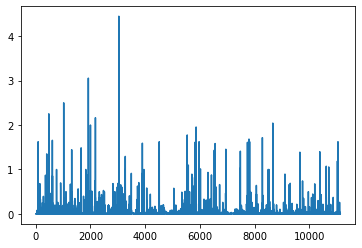

In [13]:
# 3.- Time series plot (lines)
series_pubtrade_amount = pubtrade['amount'].astype(float)
series_pubtrade_amount.plot()
pyplot.show()


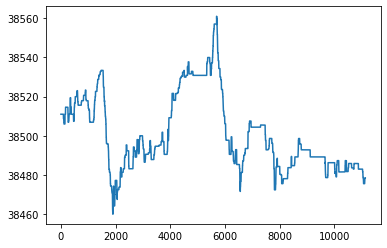

In [14]:
# Time series plot for price
series_pubtrade_price = pubtrade['price'].astype(float)
series_pubtrade_price.plot()
pyplot.show()

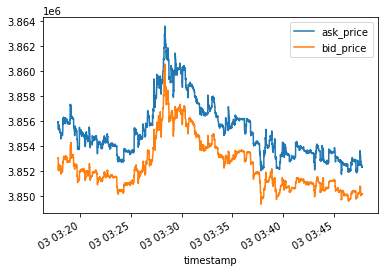

In [15]:
# Plot de precios orderbook
prices_orderbook = []
prices_ordbook = pd.DataFrame(prices_orderbook, index=vwap_grouped.index)
prices_ordbook['ask_price'] = vwap_grouped['ask_price']
prices_ordbook['bid_price'] = vwap_grouped['bid_price']

prices_ordbook.plot()
pyplot.show()


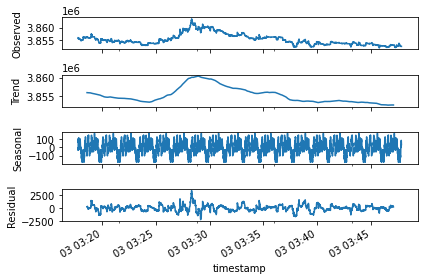

In [16]:
# Decomposition plot for Prices in orderbook
decomposition = seasonal_decompose(prices_ordbook['ask_price'], 
                                   model='additive',freq=300)
decomp = decomposition.plot()
decomp.show()

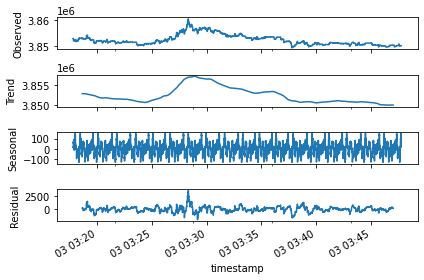

In [17]:
decomposition2 = seasonal_decompose(prices_ordbook['bid_price'],
                                    model='additive', freq=300)
decomp2 = decomposition2.plot()
decomp2.show()

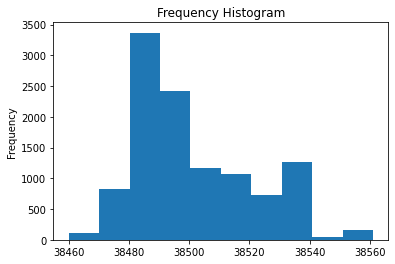

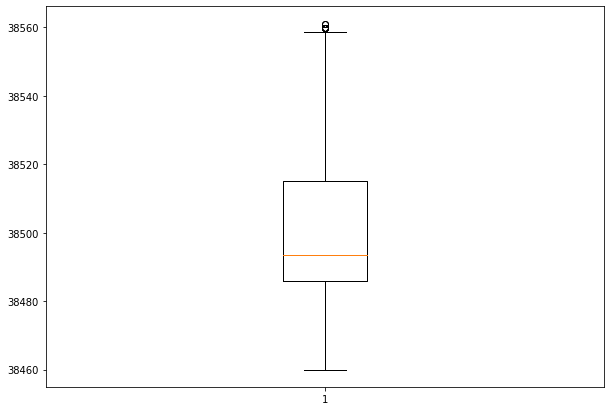

In [18]:
# Histograma Frecuencia de Variables

plt.hist(series_pubtrade_price, bins=10)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
# 5.- Boxplot (con media y mediana)
fig = plt.figure(figsize=(10, 7))

# Creating plot
plt.boxplot(series_pubtrade_price)

# show plot
plt.show()

### Creating the OHLCV dataset
OHLCV is an aggregated form of the market data, it stands for Open, High, Low, Close, and Volume.
* Open: The first price in the epoch.
* High: The highest price on the epoch.
* Low: The lowest point in the period.
* Close: The final price on the period.
* Volume: the total volume during the period.

The dataset is formed with the volume per period and the midprice of such period.

In [19]:
#OHLCV

ohlcv = spread_table['mid_price'].resample('3S').ohlc()
time = ohlcv.index
ohlcv['volume'] = vwap_grouped['total_vol'].resample('3S').sum()
ohlcv

open       high        low      close     volume
timestamp                                                                 
2022-05-03 03:17:48  38558.760  38559.395  38555.500  38555.500  548.04558
2022-05-03 03:17:51  38554.840  38557.180  38554.840  38556.545  659.20366
2022-05-03 03:17:54  38555.710  38555.710  38553.530  38553.555  525.56468
2022-05-03 03:17:57  38553.530  38554.000  38553.075  38553.075  538.29700
2022-05-03 03:18:00  38552.185  38553.075  38551.430  38552.185  563.00738
...                        ...        ...        ...        ...        ...
2022-05-03 03:47:33  38524.540  38535.755  38524.540  38532.935  545.18972
2022-05-03 03:47:36  38532.915  38532.935  38528.220  38528.470  567.04671
2022-05-03 03:47:39  38528.220  38528.220  38525.070  38525.390  652.55257
2022-05-03 03:47:42  38525.070  38525.390  38524.530  38524.530  549.04533
2022-05-03 03:47:45  38524.530  38524.660  38524.465  38524.465  475.23207

[600 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


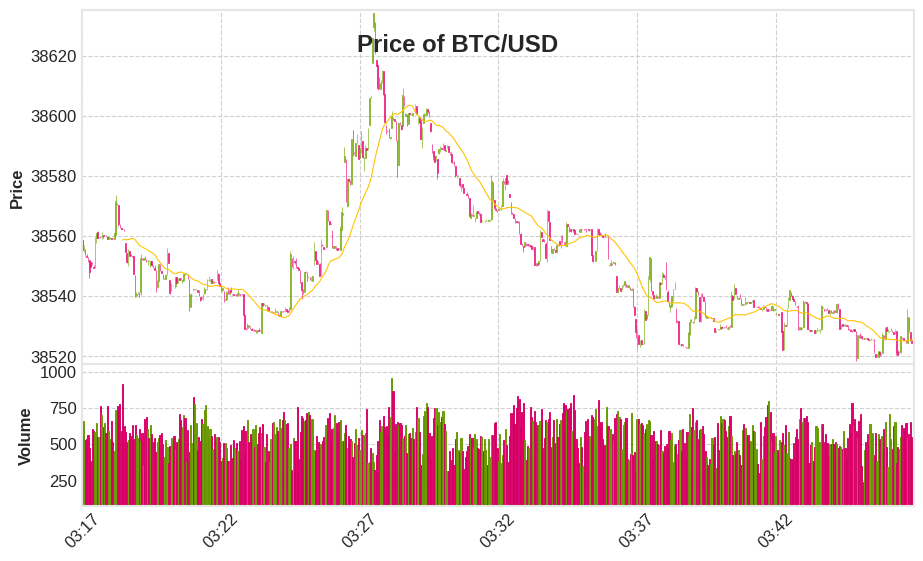

In [20]:
# Plot OHLC
TICKER = 'BTC/USD'
mpf.plot(ohlcv, figratio=(10, 6), type="candle",
         mav=30, volume=True,
         title=f"Price of {TICKER}",
         tight_layout=True, style="binance")


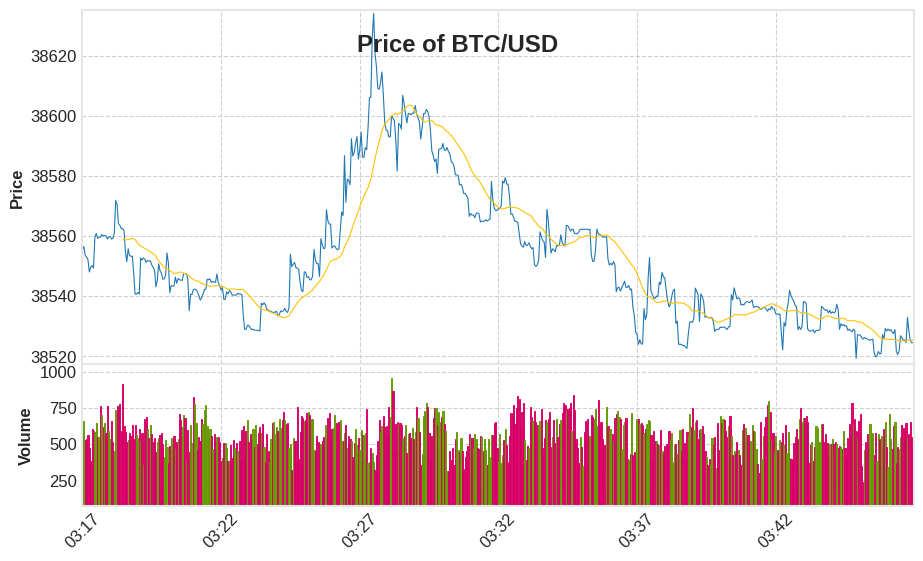

In [21]:
TICKER = 'BTC/USD'
mpf.plot(ohlcv, figratio=(10, 6), type="line",
         mav=30, volume=True,
         title=f"Price of {TICKER}",
         tight_layout=True, style="binance")


Next we will create the first features based on the OHLCV dataset.
* Volatility(HL):  $ V_t=H_t-L_t$
* High - open(HO): $ HO_t=H_t-O_t$
* Open - low(OL):  $ OL_t=O_t-L_t$
* High - Low(HL):  $ HL_t=H_t-L_t $
* Close - Open(CO): $CO_t=C_t-O_t$



In [22]:
# Volatility
volatility = []
for i in range(len(ohlcv)):
    vol = ohlcv['high'][i] - ohlcv['low'][i]
    volatility.append(vol)
ohlcv['volatility'] = volatility

# micro trends
high_open = []
for i in range(len(ohlcv)):
    ho = ohlcv['high'][i] - ohlcv['open'][i]
    high_open.append(ho)
ohlcv['high_open'] = high_open

open_low = []
for i in range(len(ohlcv)):
    ol = ohlcv['open'][i] - ohlcv['low'][i]
    open_low.append(ol)
ohlcv['open_low'] = open_low

high_low = []  # micro volatility
for i in range(len(ohlcv)):
    hl = ohlcv['high'][i] - ohlcv['low'][i]
    high_low.append(hl)
ohlcv['high_low'] = high_low

close_open = []
for i in range(len(ohlcv)):
    co = ohlcv['close'][i] - ohlcv['open'][i]
    close_open.append(co)
ohlcv['close_open'] = close_open


ohlcv

open       high        low      close     volume  \
timestamp                                                                    
2022-05-03 03:17:48  38558.760  38559.395  38555.500  38555.500  548.04558   
2022-05-03 03:17:51  38554.840  38557.180  38554.840  38556.545  659.20366   
2022-05-03 03:17:54  38555.710  38555.710  38553.530  38553.555  525.56468   
2022-05-03 03:17:57  38553.530  38554.000  38553.075  38553.075  538.29700   
2022-05-03 03:18:00  38552.185  38553.075  38551.430  38552.185  563.00738   
...                        ...        ...        ...        ...        ...   
2022-05-03 03:47:33  38524.540  38535.755  38524.540  38532.935  545.18972   
2022-05-03 03:47:36  38532.915  38532.935  38528.220  38528.470  567.04671   
2022-05-03 03:47:39  38528.220  38528.220  38525.070  38525.390  652.55257   
2022-05-03 03:47:42  38525.070  38525.390  38524.530  38524.530  549.04533   
2022-05-03 03:47:45  38524.530  38524.660  38524.465  38524.465  475.23207   

                     volatility  high_open  open_low  high_low  close_open  
timestamp                                                                   
2022-05-03 03:17:48       3.895      0.635     3.260     3.895      -3.260  
2022-05-03 03:17:51       2.340      2.340     0.000     2.340       1.705  
2022-05-03 03:17:54       2.180      0.000     2.180     2.180      -2.155  
2022-05-03 03:17:57       0.925      0.470     0.455     0.925      -0.455  
2022-05-03 03:18:00       1.645      0.890     0.755     1.645       0.000  
...                         ...        ...       ...       ...         ...  
2022-05-03 03:47:33      11.215     11.215     0.000    11.215       8.395  
2022-05-03 03:47:36       4.715      0.020     4.695     4.715      -4.445  
2022-05-03 03:47:39       3.150      0.000     3.150     3.150      -2.830  
2022-05-03 03:47:42       0.860      0.320     0.540     0.860      -0.540  
2022-05-03 03:47:45       0.195      0.130     0.065     0.195      -0.065  

[600 rows x 10 columns]

<br>

# <font color= #6B6B6B> 4. Target Engineering: Classification problem sign  </font>

Our target feature will be called sign, sign is the micro-trend $CO_t$ which will be represented in a binary way, as a 0 or 1.
* 0 = down trend.
* 1 = Up trend.

This will permit us to see the direction of the trend in price per epoch.

<hr style="border:0.02in solid gray"> </hr>

In [23]:
ohlc = pd.DataFrame(ohlcv)

sign = []

for i in range(len(ohlc)):
    sign1 = ohlc["close"][i] - ohlc["open"][i]
    sign.append(sign1)
for i in range(len(ohlc)):
    if sign[i] <= 0:
        sign[i] = 0
    else:
        sign[i] = 1
ohlc['sign'] = sign
print(ohlc)


                          open       high        low      close     volume  \
timestamp                                                                    
2022-05-03 03:17:48  38558.760  38559.395  38555.500  38555.500  548.04558   
2022-05-03 03:17:51  38554.840  38557.180  38554.840  38556.545  659.20366   
2022-05-03 03:17:54  38555.710  38555.710  38553.530  38553.555  525.56468   
2022-05-03 03:17:57  38553.530  38554.000  38553.075  38553.075  538.29700   
2022-05-03 03:18:00  38552.185  38553.075  38551.430  38552.185  563.00738   
...                        ...        ...        ...        ...        ...   
2022-05-03 03:47:33  38524.540  38535.755  38524.540  38532.935  545.18972   
2022-05-03 03:47:36  38532.915  38532.935  38528.220  38528.470  567.04671   
2022-05-03 03:47:39  38528.220  38528.220  38525.070  38525.390  652.55257   
2022-05-03 03:47:42  38525.070  38525.390  38524.530  38524.530  549.04533   
2022-05-03 03:47:45  38524.530  38524.660  38524.465  38524.465 

Next we will perform our first benchmark, the martingale, this method says that the price in $T_1$ = $T_{-1}$

In [24]:
# Martingala
ohlc['sign'] = sign
ohlc['sign_t1'] = ohlc['sign'].shift(+1)
ohlc = ohlc.fillna(0)
ohlc2 = pd.DataFrame(ohlc)
ohlc2

open       high        low      close     volume  \
timestamp                                                                    
2022-05-03 03:17:48  38558.760  38559.395  38555.500  38555.500  548.04558   
2022-05-03 03:17:51  38554.840  38557.180  38554.840  38556.545  659.20366   
2022-05-03 03:17:54  38555.710  38555.710  38553.530  38553.555  525.56468   
2022-05-03 03:17:57  38553.530  38554.000  38553.075  38553.075  538.29700   
2022-05-03 03:18:00  38552.185  38553.075  38551.430  38552.185  563.00738   
...                        ...        ...        ...        ...        ...   
2022-05-03 03:47:33  38524.540  38535.755  38524.540  38532.935  545.18972   
2022-05-03 03:47:36  38532.915  38532.935  38528.220  38528.470  567.04671   
2022-05-03 03:47:39  38528.220  38528.220  38525.070  38525.390  652.55257   
2022-05-03 03:47:42  38525.070  38525.390  38524.530  38524.530  549.04533   
2022-05-03 03:47:45  38524.530  38524.660  38524.465  38524.465  475.23207   

                     volatility  high_open  open_low  high_low  close_open  \
timestamp                                                                    
2022-05-03 03:17:48       3.895      0.635     3.260     3.895      -3.260   
2022-05-03 03:17:51       2.340      2.340     0.000     2.340       1.705   
2022-05-03 03:17:54       2.180      0.000     2.180     2.180      -2.155   
2022-05-03 03:17:57       0.925      0.470     0.455     0.925      -0.455   
2022-05-03 03:18:00       1.645      0.890     0.755     1.645       0.000   
...                         ...        ...       ...       ...         ...   
2022-05-03 03:47:33      11.215     11.215     0.000    11.215       8.395   
2022-05-03 03:47:36       4.715      0.020     4.695     4.715      -4.445   
2022-05-03 03:47:39       3.150      0.000     3.150     3.150      -2.830   
2022-05-03 03:47:42       0.860      0.320     0.540     0.860      -0.540   
2022-05-03 03:47:45       0.195      0.130     0.065     0.195      -0.065   

                     sign  sign_t1  
timestamp                           
2022-05-03 03:17:48     0      0.0  
2022-05-03 03:17:51     1      0.0  
2022-05-03 03:17:54     0      1.0  
2022-05-03 03:17:57     0      0.0  
2022-05-03 03:18:00     0      0.0  
...                   ...      ...  
2022-05-03 03:47:33     1      0.0  
2022-05-03 03:47:36     0      1.0  
2022-05-03 03:47:39     0      0.0  
2022-05-03 03:47:42     0      0.0  
2022-05-03 03:47:45     0      0.0  

[600 rows x 12 columns]

<br>

# <font color= #6B6B6B> 5. Logistic Regression  </font>

<hr style="border:0.02in solid gray"> </hr>

For the next benchmark a Logistic Regresion was chosen, the reason being that the target variable is categorical in nature, being a binary variable composed of an array of 0 and 1.

The first step for this benchmark is to create a heatmap which will represent the relationship between the variables.

                open      high       low     close    volume  volatility  \
open        1.000000  0.992719  0.995822  0.987420  0.075804    0.170581   
high        0.992719  1.000000  0.990916  0.996193  0.074977    0.259512   
low         0.995822  0.990916  1.000000  0.993142  0.078192    0.127283   
close       0.987420  0.996193  0.993142  1.000000  0.078688    0.215450   
volume      0.075804  0.074977  0.078192  0.078688  1.000000   -0.008520   
volatility  0.170581  0.259512  0.127283  0.215450 -0.008520    1.000000   
high_open   0.032875  0.153022  0.052190  0.164905  0.000208    0.753836   
open_low    0.210732  0.184101  0.120592  0.102668 -0.012976    0.491845   
high_low    0.170581  0.259512  0.127283  0.215450 -0.008520    1.000000   
close_open -0.088379  0.012817 -0.025980  0.070233  0.017471    0.281103   
sign       -0.056512  0.004586 -0.021510  0.035883 -0.002967    0.188298   
sign_t1     0.031509  0.033663  0.030185  0.031345  0.042221    0.031518   

           

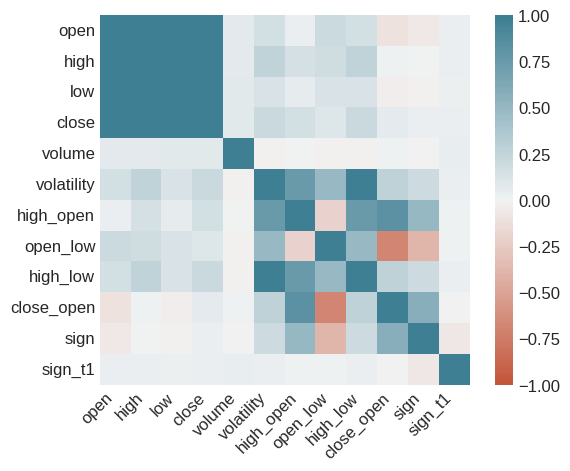

In [25]:
# Heat map
correlation = ohlc2.corr()
print(correlation)

heat = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

It can be observed that there is correlation on some of the variables, in future instances this will be corrected and more features will be droped.

In [26]:
print(ohlc2.describe())

               open          high           low         close      volume  \
count    600.000000    600.000000    600.000000    600.000000  600.000000   
mean   38551.493083  38552.729833  38550.289350  38551.490233  566.487106   
std       22.121244     22.372774     21.783456     22.089230  111.983279   
min    38519.240000  38520.590000  38518.490000  38519.255000  239.576690   
25%    38535.082500  38535.882500  38534.427500  38535.090000  492.464243   
50%    38545.530000  38546.685000  38544.540000  38545.635000  564.540475   
75%    38562.250000  38562.485000  38561.445000  38562.290000  646.224000   
max    38631.265000  38634.295000  38628.325000  38634.220000  957.013600   

       volatility   high_open    open_low    high_low  close_open        sign  \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean     2.440483    1.236750    1.203733    2.440483   -0.002850    0.391667   
std      3.033340    2.696283    2.034756    3.033340    3.5064

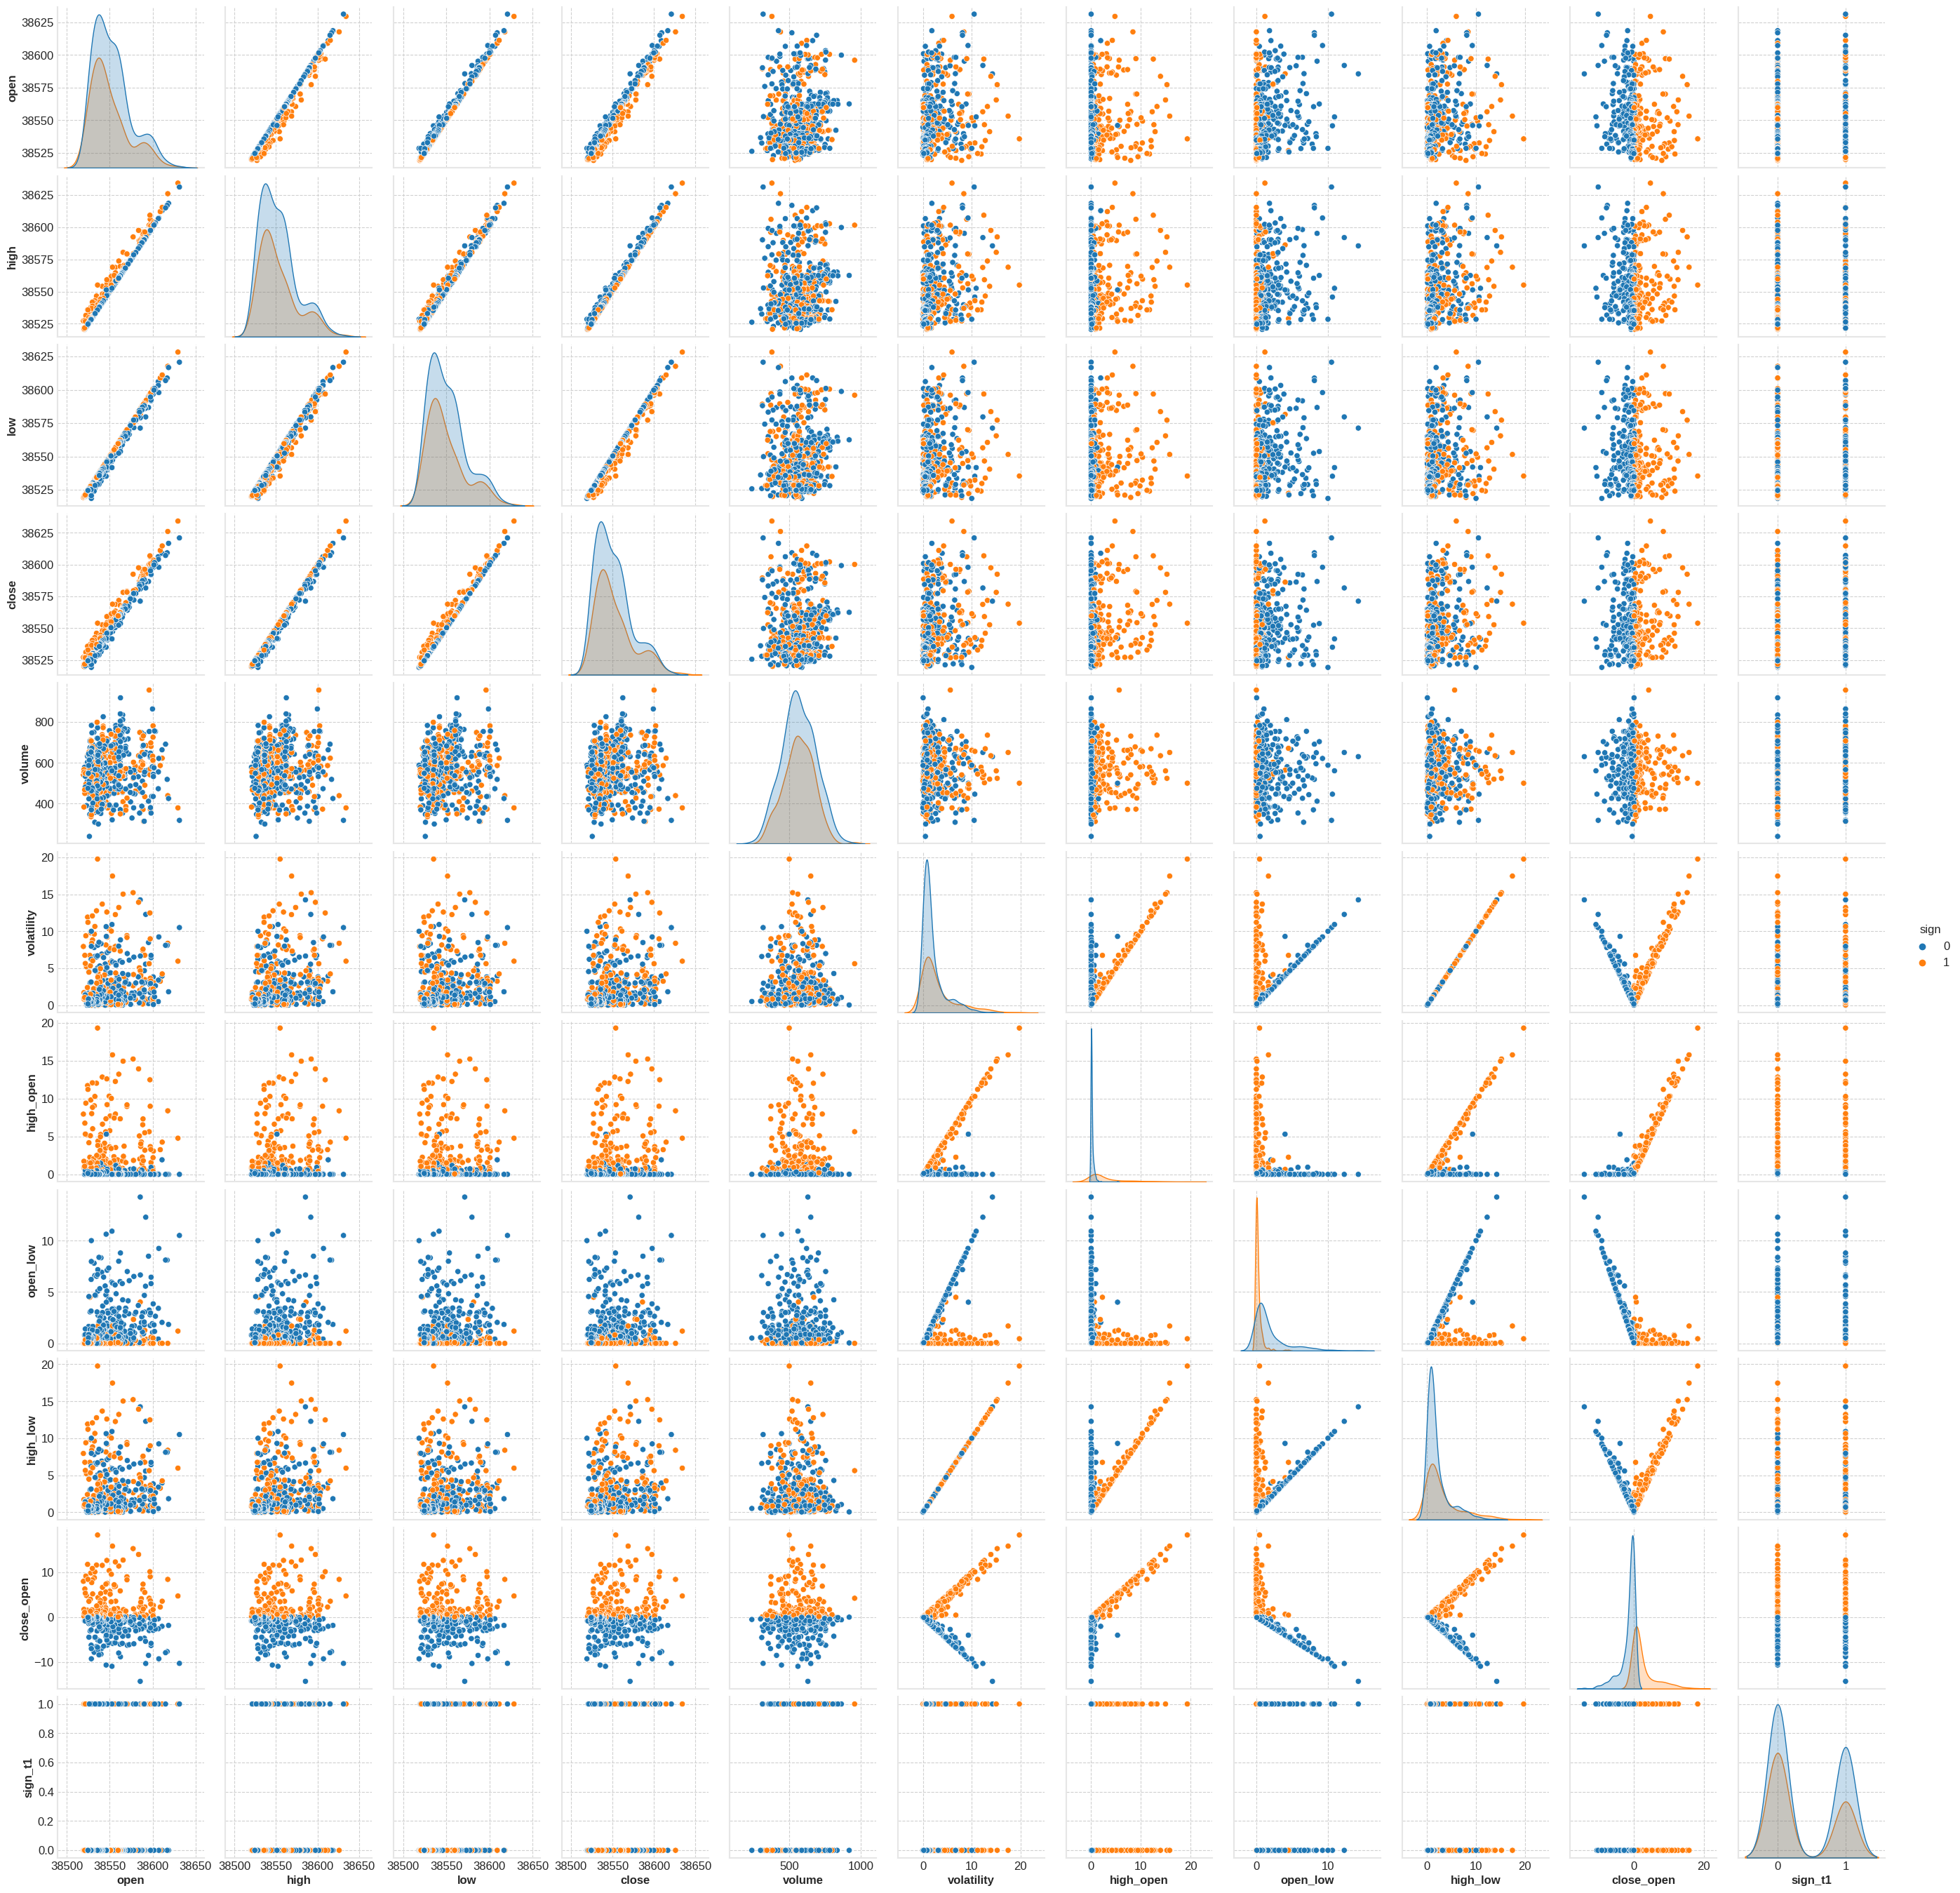

In [27]:
sns.pairplot(ohlc2, hue='sign', height=2.5)


In [28]:
# Second order ops Moving average, std,
ma = ohlc2.rolling(5).mean()
std = ohlc2.std()
ma,std

(                          open       high        low      close      volume  \
 timestamp                                                                     
 2022-05-03 03:17:48        NaN        NaN        NaN        NaN         NaN   
 2022-05-03 03:17:51        NaN        NaN        NaN        NaN         NaN   
 2022-05-03 03:17:54        NaN        NaN        NaN        NaN         NaN   
 2022-05-03 03:17:57        NaN        NaN        NaN        NaN         NaN   
 2022-05-03 03:18:00  38555.005  38555.872  38553.675  38554.172  566.823660   
 ...                        ...        ...        ...        ...         ...   
 2022-05-03 03:47:33  38525.553  38527.842  38525.091  38526.883  605.208042   
 2022-05-03 03:47:36  38526.894  38529.149  38525.595  38527.347  591.538544   
 2022-05-03 03:47:39  38527.301  38529.556  38525.552  38527.346  599.362912   
 2022-05-03 03:47:42  38527.228  38529.547  38525.380  38527.173  591.696130   
 2022-05-03 03:47:45  38527.055  38529.3

In [29]:
# Preprocessing Log, Scale, Standardize (mean, median), Normalize
X = ohlc2.iloc[:, 4:-2]
y = ohlc2['sign']
y_true = y
X

volume  volatility  high_open  open_low  high_low  \
timestamp                                                                   
2022-05-03 03:17:48  548.04558       3.895      0.635     3.260     3.895   
2022-05-03 03:17:51  659.20366       2.340      2.340     0.000     2.340   
2022-05-03 03:17:54  525.56468       2.180      0.000     2.180     2.180   
2022-05-03 03:17:57  538.29700       0.925      0.470     0.455     0.925   
2022-05-03 03:18:00  563.00738       1.645      0.890     0.755     1.645   
...                        ...         ...        ...       ...       ...   
2022-05-03 03:47:33  545.18972      11.215     11.215     0.000    11.215   
2022-05-03 03:47:36  567.04671       4.715      0.020     4.695     4.715   
2022-05-03 03:47:39  652.55257       3.150      0.000     3.150     3.150   
2022-05-03 03:47:42  549.04533       0.860      0.320     0.540     0.860   
2022-05-03 03:47:45  475.23207       0.195      0.130     0.065     0.195   

                     close_open  
timestamp                        
2022-05-03 03:17:48      -3.260  
2022-05-03 03:17:51       1.705  
2022-05-03 03:17:54      -2.155  
2022-05-03 03:17:57      -0.455  
2022-05-03 03:18:00       0.000  
...                         ...  
2022-05-03 03:47:33       8.395  
2022-05-03 03:47:36      -4.445  
2022-05-03 03:47:39      -2.830  
2022-05-03 03:47:42      -0.540  
2022-05-03 03:47:45      -0.065  

[600 rows x 6 columns]

To use the data in the log regression we require to fit the data trought transformations as the data has different scales which would give us a bad forecast.

* The first one is the Normalizer which transforms numeric columns to a standard scale. in this instance it is done by the maximum absolute scaling method which has the following formula:
$$ x_{scaled} =\frac{ x}{max(|x|)} $$

In [30]:
# Normalizer
transformer = Normalizer(norm= 'max').fit(X) 
transformed = transformer.transform(X)
X_normalized = pd.DataFrame(transformed,index = X.index, columns= X.columns)
X_normalized 

volume  volatility  high_open  open_low  high_low  \
timestamp                                                                
2022-05-03 03:17:48     1.0    0.007107   0.001159  0.005948  0.007107   
2022-05-03 03:17:51     1.0    0.003550   0.003550  0.000000  0.003550   
2022-05-03 03:17:54     1.0    0.004148   0.000000  0.004148  0.004148   
2022-05-03 03:17:57     1.0    0.001718   0.000873  0.000845  0.001718   
2022-05-03 03:18:00     1.0    0.002922   0.001581  0.001341  0.002922   
...                     ...         ...        ...       ...       ...   
2022-05-03 03:47:33     1.0    0.020571   0.020571  0.000000  0.020571   
2022-05-03 03:47:36     1.0    0.008315   0.000035  0.008280  0.008315   
2022-05-03 03:47:39     1.0    0.004827   0.000000  0.004827  0.004827   
2022-05-03 03:47:42     1.0    0.001566   0.000583  0.000984  0.001566   
2022-05-03 03:47:45     1.0    0.000410   0.000274  0.000137  0.000410   

                     close_open  
timestamp                        
2022-05-03 03:17:48   -0.005948  
2022-05-03 03:17:51    0.002586  
2022-05-03 03:17:54   -0.004100  
2022-05-03 03:17:57   -0.000845  
2022-05-03 03:18:00    0.000000  
...                         ...  
2022-05-03 03:47:33    0.015398  
2022-05-03 03:47:36   -0.007839  
2022-05-03 03:47:39   -0.004337  
2022-05-03 03:47:42   -0.000984  
2022-05-03 03:47:45   -0.000137  

[600 rows x 6 columns]

The second method chosen was Min Max Scaler, which transforms the features by scaling them to a given range in this case 0 to 1.

$$ X_{norm}= \frac{X-X_{min}} {X_{max}-X_{min}} $$

In [31]:
#  Min Max Scaler
scale = MinMaxScaler()
X_scale = scale.fit(X)
X_scale = scale.transform(X)
X_scale = pd.DataFrame(X_scale,index = X.index, columns= X.columns)
X_scale

volume  volatility  high_open  open_low  high_low  \
timestamp                                                                  
2022-05-03 03:17:48  0.429960    0.197066   0.032876  0.228692  0.197066   
2022-05-03 03:17:51  0.584897    0.118391   0.121149  0.000000  0.118391   
2022-05-03 03:17:54  0.398625    0.110296   0.000000  0.152929  0.110296   
2022-05-03 03:17:57  0.416372    0.046800   0.024333  0.031919  0.046800   
2022-05-03 03:18:00  0.450814    0.083228   0.046078  0.052964  0.083228   
...                       ...         ...        ...       ...       ...   
2022-05-03 03:47:33  0.425979    0.567417   0.580637  0.000000  0.567417   
2022-05-03 03:47:36  0.456444    0.238553   0.001035  0.329358  0.238553   
2022-05-03 03:47:39  0.575627    0.159373   0.000000  0.220975  0.159373   
2022-05-03 03:47:42  0.431353    0.043511   0.016567  0.037881  0.043511   
2022-05-03 03:47:45  0.328468    0.009866   0.006731  0.004560  0.009866   

                     close_open  
timestamp                        
2022-05-03 03:17:48    0.338308  
2022-05-03 03:17:51    0.491077  
2022-05-03 03:17:54    0.372308  
2022-05-03 03:17:57    0.424615  
2022-05-03 03:18:00    0.438615  
...                         ...  
2022-05-03 03:47:33    0.696923  
2022-05-03 03:47:36    0.301846  
2022-05-03 03:47:39    0.351538  
2022-05-03 03:47:42    0.422000  
2022-05-03 03:47:45    0.436615  

[600 rows x 6 columns]

The last one is the standardization method, which removes the mean and sacales to unit variance.

$$ Z=\frac{(X-u)}{S} $$
where:
* U = mean of the training samples 
* S= Standard deviation

In [32]:
# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_standard = pd.DataFrame(scaled,index = X.index, columns= X.columns)
X_standard

volume  volatility  high_open  open_low  high_low  \
timestamp                                                                  
2022-05-03 03:17:48 -0.164818    0.479910  -0.223364  1.011415  0.479910   
2022-05-03 03:17:51  0.828641   -0.033154   0.409516 -0.592080 -0.033154   
2022-05-03 03:17:54 -0.365738   -0.085945  -0.459070  0.480196 -0.085945   
2022-05-03 03:17:57 -0.251945   -0.500026  -0.284610 -0.368279 -0.500026   
2022-05-03 03:18:00 -0.031100   -0.262465  -0.128710 -0.220718 -0.262465   
...                       ...         ...        ...       ...       ...   
2022-05-03 03:47:33 -0.190342    2.895105   3.703831 -0.592080  2.895105   
2022-05-03 03:47:36  0.005001    0.750465  -0.451646  1.717248  0.750465   
2022-05-03 03:47:39  0.769198    0.234101  -0.459070  0.957309  0.234101   
2022-05-03 03:47:42 -0.155883   -0.521472  -0.340289 -0.326470 -0.521472   
2022-05-03 03:47:45 -0.815579   -0.740885  -0.410815 -0.560108 -0.740885   

                     close_open  
timestamp                        
2022-05-03 03:17:48   -0.929680  
2022-05-03 03:17:51    0.487467  
2022-05-03 03:17:54   -0.614282  
2022-05-03 03:17:57   -0.129056  
2022-05-03 03:18:00    0.000813  
...                         ...  
2022-05-03 03:47:33    2.396976  
2022-05-03 03:47:36   -1.267911  
2022-05-03 03:47:39   -0.806946  
2022-05-03 03:47:42   -0.153317  
2022-05-03 03:47:45   -0.017739  

[600 rows x 6 columns]

              volume  volatility  high_open  open_low  high_low  close_open  \
volume      1.000000    0.022406   0.011313  0.051202  0.022406    0.019796   
volatility  0.022406    1.000000   0.280300  0.401479  1.000000   -0.051920   
high_open   0.011313    0.280300   1.000000 -0.602524  0.280300    0.806897   
open_low    0.051202    0.401479  -0.602524  1.000000  0.401479   -0.810166   
high_low    0.022406    1.000000   0.280300  0.401479  1.000000   -0.051920   
close_open  0.019796   -0.051920   0.806897 -0.810166 -0.051920    1.000000   
Sign        0.003144    0.144834   0.744700 -0.628948  0.144834    0.845591   

                Sign  
volume      0.003144  
volatility  0.144834  
high_open   0.744700  
open_low   -0.628948  
high_low    0.144834  
close_open  0.845591  
Sign        1.000000  


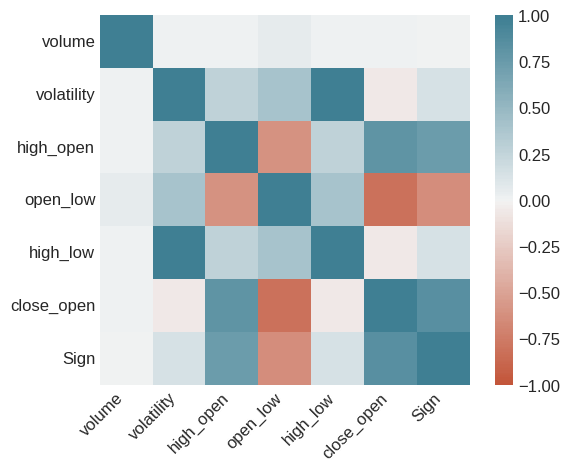

In [33]:

correla = pd.DataFrame(X_scale, index=ohlc2.index).copy()
correla['Sign'] = ohlc2['sign']
correlation_transformed = correla.corr(method='spearman')
print(correlation_transformed)

heat2 = sns.heatmap(
    correlation_transformed,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat2.set_xticklabels(
    heat2.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [34]:
X_scale


volume  volatility  high_open  open_low  high_low  \
timestamp                                                                  
2022-05-03 03:17:48  0.429960    0.197066   0.032876  0.228692  0.197066   
2022-05-03 03:17:51  0.584897    0.118391   0.121149  0.000000  0.118391   
2022-05-03 03:17:54  0.398625    0.110296   0.000000  0.152929  0.110296   
2022-05-03 03:17:57  0.416372    0.046800   0.024333  0.031919  0.046800   
2022-05-03 03:18:00  0.450814    0.083228   0.046078  0.052964  0.083228   
...                       ...         ...        ...       ...       ...   
2022-05-03 03:47:33  0.425979    0.567417   0.580637  0.000000  0.567417   
2022-05-03 03:47:36  0.456444    0.238553   0.001035  0.329358  0.238553   
2022-05-03 03:47:39  0.575627    0.159373   0.000000  0.220975  0.159373   
2022-05-03 03:47:42  0.431353    0.043511   0.016567  0.037881  0.043511   
2022-05-03 03:47:45  0.328468    0.009866   0.006731  0.004560  0.009866   

                     close_open  
timestamp                        
2022-05-03 03:17:48    0.338308  
2022-05-03 03:17:51    0.491077  
2022-05-03 03:17:54    0.372308  
2022-05-03 03:17:57    0.424615  
2022-05-03 03:18:00    0.438615  
...                         ...  
2022-05-03 03:47:33    0.696923  
2022-05-03 03:47:36    0.301846  
2022-05-03 03:47:39    0.351538  
2022-05-03 03:47:42    0.422000  
2022-05-03 03:47:45    0.436615  

[600 rows x 6 columns]

The logistic Regression was chosen because of the type of target variable which is a binary categorical kind of feature. 
* The cost function in this case is the following one:
$$ \underset{w,c}{min}\frac{1-p}{2}{w}^{T}w+\rho||w||_1+C\sum_{i=1}^{n}log(exp(-y_i(\mathrm{X}_{i}^{T}w+c))+1) $$

This cost function is the one used for Elastic Net regularization, which is a combination of the L1 and L2 penalizations.

Next we split the dataset, as this is a timeseries we require to split it without changing the timeline or it would influence the forecasting.

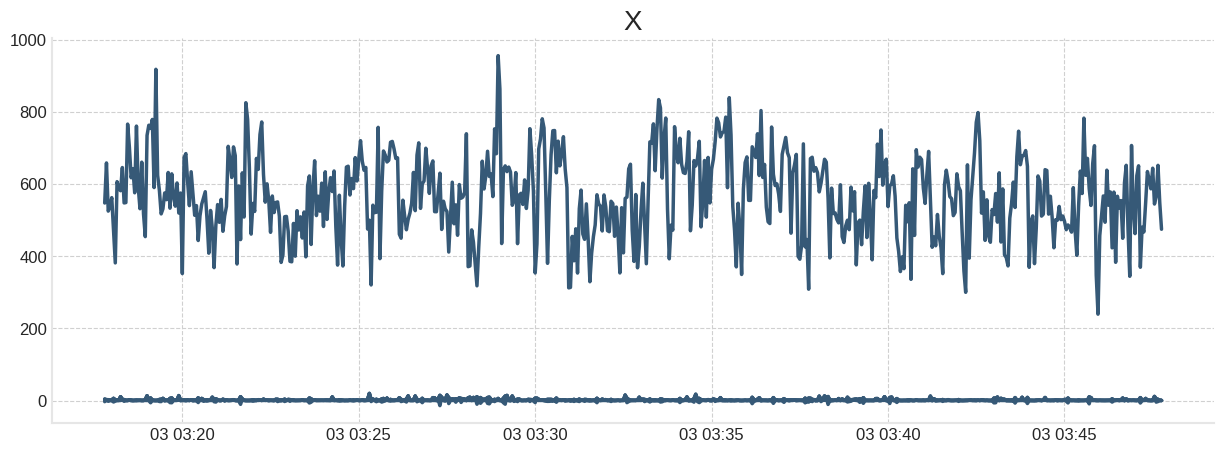

In [44]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('X',size=20)
plt.plot(X)


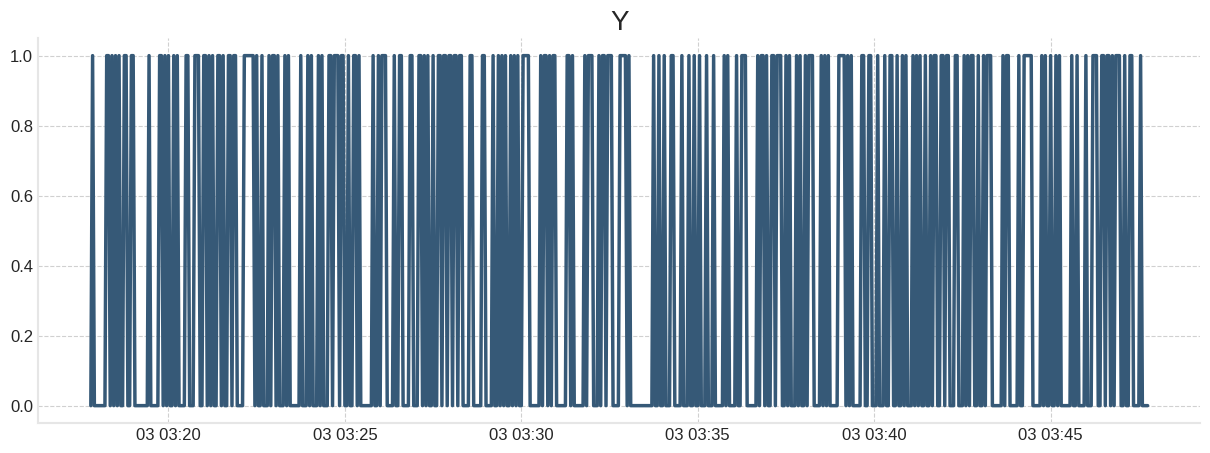

In [48]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('Y',size=20)
plt.plot(y)

In [82]:
test_size = int(len(X)*.20)

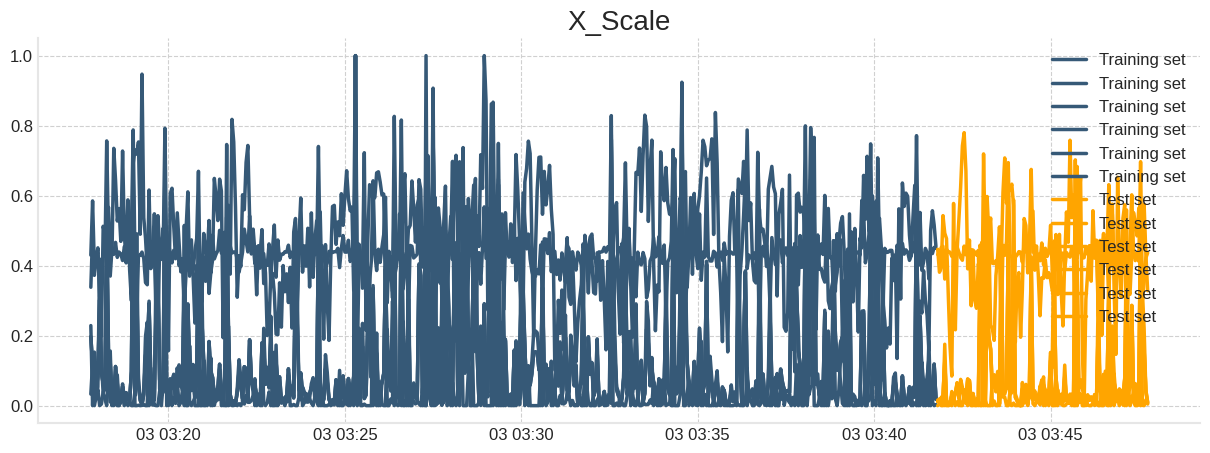

In [85]:
X_train = X_scale[:-test_size]
X_test = X_scale[-test_size:]

plt.title('X_Scale', size=20)
plt.plot(X_train, label='Training set')
plt.plot(X_test, label='Test set', color='orange')
plt.legend();

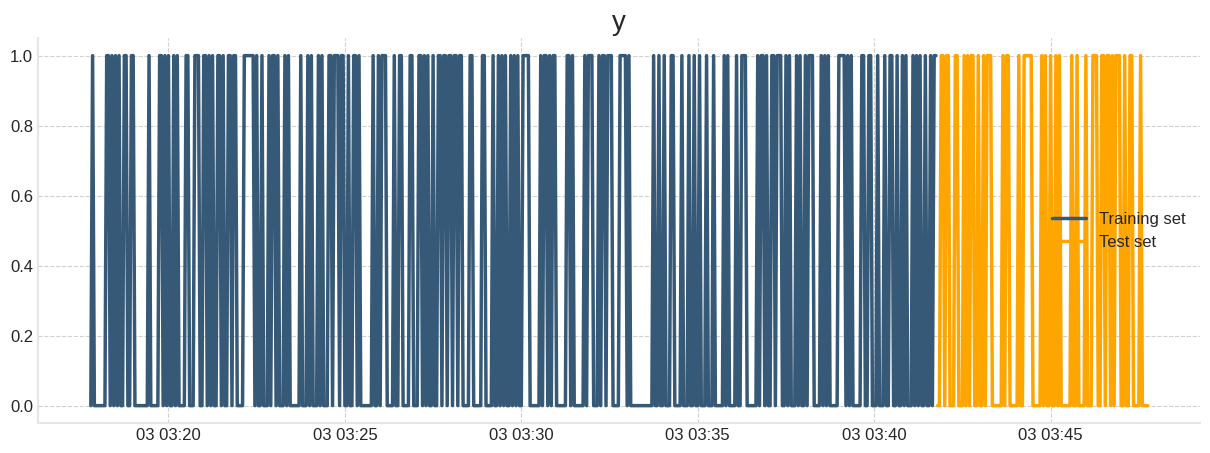

In [86]:
y_train = y[:-test_size]
y_test = y[-test_size:]

plt.title('y', size=20)
plt.plot(y_train, label='Training set')
plt.plot(y_test, label='Test set', color='orange')
plt.legend();

Experiment to split the timeseries to see if that fixes the leak of information.

In [67]:
# Logistic Regression
#x_train, x_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.20,
                                                    #random_state=False)
# model fit
logistic_model = LogisticRegression(random_state=None, penalty='elasticnet',
                                    solver='saga', l1_ratio=1, max_iter=4000)
logistic_model.fit(x_train, y_train)

# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model.score(X_normalized, y)
confusion_mat = confusion_matrix(y_test, y_pred)

In [68]:

# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model.score(X_normalized, y)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy is", accuracy)
print("Confusion Matrix")
print(confusion_mat)


Accuracy is 88.33333333333333
Confusion Matrix
[[73  0]
 [14 33]]


In [69]:
x_test

volume  volatility  high_open  open_low  high_low  \
timestamp                                                                  
2022-05-03 03:41:48  0.446698    0.011384   0.000000  0.015784  0.011384   
2022-05-03 03:41:51  0.381123    0.017708   0.004401  0.018590  0.017708   
2022-05-03 03:41:54  0.393534    0.022009   0.022521  0.000000  0.022009   
2022-05-03 03:41:57  0.542891    0.027827   0.028475  0.000000  0.027827   
2022-05-03 03:42:00  0.492784    0.126486   0.000000  0.175377  0.126486   
...                       ...         ...        ...       ...       ...   
2022-05-03 03:47:33  0.425979    0.567417   0.580637  0.000000  0.567417   
2022-05-03 03:47:36  0.456444    0.238553   0.001035  0.329358  0.238553   
2022-05-03 03:47:39  0.575627    0.159373   0.000000  0.220975  0.159373   
2022-05-03 03:47:42  0.431353    0.043511   0.016567  0.037881  0.043511   
2022-05-03 03:47:45  0.328468    0.009866   0.006731  0.004560  0.009866   

                     close_open  
timestamp                        
2022-05-03 03:41:48    0.431692  
2022-05-03 03:41:51    0.430462  
2022-05-03 03:41:54    0.452000  
2022-05-03 03:41:57    0.455538  
2022-05-03 03:42:00    0.361692  
...                         ...  
2022-05-03 03:47:33    0.696923  
2022-05-03 03:47:36    0.301846  
2022-05-03 03:47:39    0.351538  
2022-05-03 03:47:42    0.422000  
2022-05-03 03:47:45    0.436615  

[120 rows x 6 columns]

<br>

# <font color= #6B6B6B> <font size = 6> 6. Results </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 5.1 Results of first processes </font>

Martingale method gave poor results, which is quite obvious because of the nature of the method, as this is a benchmark method it will be our score to beat with the others.

In [70]:
accuracy_martingala = accuracy_score(ohlc['sign'], ohlc['sign_t1']) * 100
print(accuracy_martingala)

49.0


<br>

## <font color= #6B6B6B> 5.2 Results of another proces </font>

In [71]:
# Model Evaluation
y_pred2 = pd.DataFrame(y_pred)
# recall tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='micro')
print(recall)

0.8833333333333333


In [72]:
# Precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='micro')
print(precision)

0.8833333333333333


In [73]:

# F1 F1 = 2 * (precision * recall) / (precision + recall)
f1_score = 2*(precision*recall)/(precision + recall)
print(f1_score)

0.8833333333333333


In [74]:
# accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(accuracy)

88.33333333333333


First there were problems with data leaking which gave higher accuracy scores and it appears to be solved with the current slit method, the other issue to solve is the chosen variables, which appear to be correlated, and will require a different approach to chose them. One possibility is the use of a Symbolic regressor to get symbolic variables and get a better more accurate result.


# <font color= #6B6B6B> <font size = 6> 5.2. Symbolic Regresor Experiment</font>

Symbolic regression is a type of machine learning which aims to reveal and underlying mathematical that best describes the relationship between variables, it builds a population of random formulas to represent the relationship between variables. Then it creates generations of programs which evolve over time,and does the same process to the fittest individuals in the population. This was an experiment to create more variables to explain the model, and will be continued on the next IDI.

In [75]:
# k fault Symbolic Regressor
#x_test = pd.DataFrame(X_scale,index = X.index, columns= X.columns)
#X_train, X_test, y_train, y_test = train_test_split(x_test, y, test_size=0.20,
                                                  #  random_state=False)


In [76]:
# First Test
function_set = ['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg', 'inv']
est_gp = SymbolicRegressor(population_size=5000, function_set=function_set,
                           generations=40, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                           feature_names=X_train.columns)
converter = {
    'sub': lambda x, y: x - y,
    'div': lambda x, y: x / y,
    'mul': lambda x, y: x * y,
    'add': lambda x, y: x + y,
    'neg': lambda x: -x,
    'pow': lambda x, y: x ** y,
    'sin': lambda x: sin(x),
    'cos': lambda x: cos(x),
    'inv': lambda x: 1 / x,
    'sqrt': lambda x: x ** 0.5,
    'pow3': lambda x: x ** 3
}
est_gp.fit(X_train, y_train)
print('R2:', est_gp.score(X_test, y_test))

next_e = sympify(est_gp.program, locals=converter)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.15           8315.6        8         0.191343         0.328313      4.39m
   1     4.48          10.4502        8         0.154613         0.241068      6.21m
   2     3.59          129.185        3         0.152231            0.277      6.84m
   3     4.03          189.452        6         0.146534          0.23973      6.11m
   4     3.18          86.5077        3         0.150201         0.295266      5.32m
   5     3.15          6.45733        3         0.146835         0.325565      5.09m
   6     3.16          1886.41        3         0.148806          0.30782      5.40m
   7     3.16          267.754        3         0.149412         0.302367      5.11m
   8     3.14          5.17269        3         0.149806          0.29882  

AttributeError: ignored

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).\
[2] Takuya Shintate and Lukáš Pichl, 2019,Trend Prediction Classification for High Frequency Bitcoin Time Series with Deep Learning  
[3] BOUCHAUD, Trades,Quotes and Prices, 2018\
[4] Hasbrouck, Empirical Market Microestructure, 2007,Oxford University Press.